In [1]:
# data preprocessing
import pandas as pd
import re, MeCab
# wordcloud & other visualizations
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [2]:
# substring for the chart titles
SUBTITLE = 'Ep. 1-200 (174 eps.)'

df1 = pd.read_csv('datasets\hologra_comments_part_1.csv')
df2 = pd.read_csv('datasets\hologra_comments_part_2.csv')
df3 = pd.read_csv('datasets\hologra_comments_part_3.csv')
df4 = pd.read_csv('datasets\hologra_comments_part_4.csv')
df = pd.concat([df1, df2, df3, df4], axis=0)
df.head()

,comment
0,あやめのけつやないかーい
1,ケツやないかーい
2,フォントw
3,1:01自分用
4,1:01


In [3]:
mct = MeCab.Tagger('-Owakati')
hiragana_katakana = ['あ', 'い', 'う', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん', 'ア', 'イ', 'ウ', 'エ', 'オ', 'カ', 'ガ', 'キ', 'ギ', 'ク', 'グ', 'ケ', 'ゲ', 'コ', 'ゴ', 'サ', 'ザ', 'シ', 'ジ', 'ス', 'ズ', 'セ', 'ゼ', 'ソ', 'ゾ', 'タ', 'ダ', 'チ', 'ヂ', 'ツ', 'ヅ', 'テ', 'デ', 'ト', 'ド', 'ナ', 'ニ', 'ヌ', 'ネ', 'ノ', 'ハ', 'バ', 'パ', 'ヒ', 'ビ', 'ピ', 'フ', 'ブ', 'プ', 'ヘ', 'ベ', 'ペ', 'ホ', 'ボ', 'ポ', 'マ', 'ミ', 'ム', 'メ', 'モ', 'ヤ', 'ユ', 'ヨ', 'ラ', 'リ', 'ル', 'レ', 'ロ', 'ワ', 'ヲ', 'ン']
particles = ['かしら', 'から', 'きり', 'くらい', 'けれども', 'こと', 'さえ', 'しか', 'すら', 'たら', 'たり', 'だけ', 'だの', 'ても', 'てわ', 'でも', 'という', 'とか', 'ところ', 'として', 'とも', 'ながら', 'など', 'なり', 'ので', 'のに', 'のみ', 'ばかり', 'ほど', 'まで', 'ものか', 'やら', 'より', 'なら']
demonstratives = ['これ', 'それ', 'あれ', 'どれ', 'ここ', 'そこ', 'あそこ', 'どこ', 'こっち', 'そっち', 'あっち', 'どっち', 'この', 'その', 'あの', 'どの', 'こんな', 'そんな', 'あんな', 'どんな', 'こう', 'そう', 'ああ', 'どんあ']
misc = ['。', '・', 'ぇ', 'ぃ', 'ぉ', 'です', 'ます', 'ない', 'なく', 'まし', 'たい', 'てぇ', 'よう', 'ええ', 'って', 'する', 'けど', 'けど', 'てる', 'ぁ', 'なっ', 'だっ', 'ある', 'なぁ', 'ねぇ', 'つまり', 'ところで', 'またわ', 'さらに', 'やっ', 'また','ぐら']
filter_words = hiragana_katakana + particles + demonstratives + misc
length = len(df)
progress = 0

def preprocess(text):
    global progress
    progress += 1
    print(f'{progress / length * 100:.2f}%\t{progress}/{length}', end='\r')

    jp = re.sub(r'[^\u3041-\u3096\u30A0-\u30FF\u3400-\u4DBF\u4E00-\u9FFF\uF900-\uFAFF]+', '', str(text))
    tokens = mct.parse(jp).strip().split()
    remove_chars = [s for s in tokens if s not in filter_words]
    output = ' '.join(remove_chars)
    return output

df['cleaned'] = df['comment'].apply(preprocess)
df = df.replace('', float('NaN')).dropna().drop_duplicates(subset='cleaned')
print(len(df))
df.head()

241719%	572645/572645


,comment,cleaned
0,あやめのけつやないかーい,あやめ けつ かー
1,ケツやないかーい,ケツ かー
2,フォントw,フォント
3,1:01自分用,自分 用
5,1:01ここが一番見られてる,一番 見 られ


In [4]:
final_string = ''
for i in range(len(df)):
    final_string += df['cleaned'].values[i] + ' '
    
print(f'String length: {len(final_string):,}')
print(f'Word amount: {len(final_string.split()):,}')

String length: 4,595,084
Word amount: 1,417,476


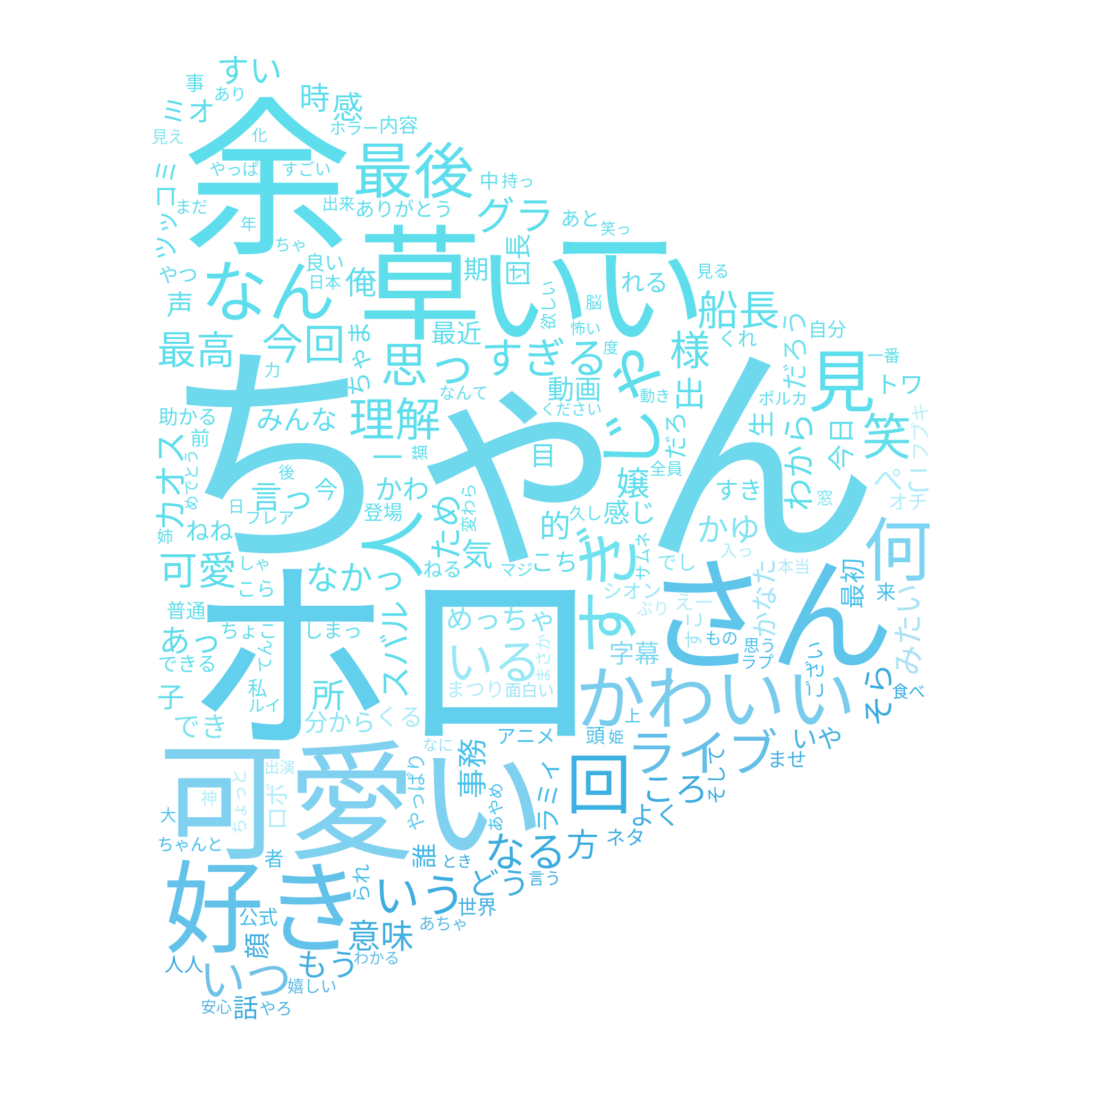

In [5]:
# generate word cloud image
mask = np.array(Image.open('assets/Hololive_logo.png')) # bg must be white
wc = WordCloud(
    mask=mask,
    width=mask.shape[1],
    height=mask.shape[0],
    background_color='white',
    random_state=42,
    collocations=False,
    font_path='NotoSansJP-Regular.otf',
    ).generate(final_string)
# color texts similar to mask image's colors
image_colors = ImageColorGenerator(mask)
# display image
plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig('visuals/word_cloud_jp.png', transparent=False, dpi=300) # lower dpi if not enough memory
plt.show()

In [6]:
counter = Counter(final_string.split())
top_words_200 = np.array(counter.most_common(200)).transpose()
top_words_10 = np.array(counter.most_common(10)).transpose()

plt.rc('font', size=10)         # default text sizes
plt.rc('axes', titlesize=20)    # axes title
plt.rc('axes', labelsize=16)    # x and y labels
plt.rc('xtick', labelsize=10)   # tick labels
plt.rc('ytick', labelsize=10)   # tick labels
plt.rc('legend', fontsize=10)   # legend fontsize
plt.rc('figure', titlesize=32)  # figure title

def add_labels(x, y, offset):
    print(x, y)
    for i in range(len(x)):
        plt.text(i, y[i] - offset, y[i], ha='center')

In [7]:
# set font family for matplotlib
jp_font = fm.FontEntry(fname='assets/NotoSansJP-Regular.otf', name='noto_sans_jp')
fm.fontManager.ttflist.insert(0, jp_font)
plt.rcParams['font.family'] = jp_font.name

['ちゃん' 'ホロ' '余' '可愛い' 'ー' '草' 'さん' 'いい' '好き' 'かわいい'] [22031, 16611, 10564, 9512, 9494, 8878, 8775, 8339, 7840, 7760]


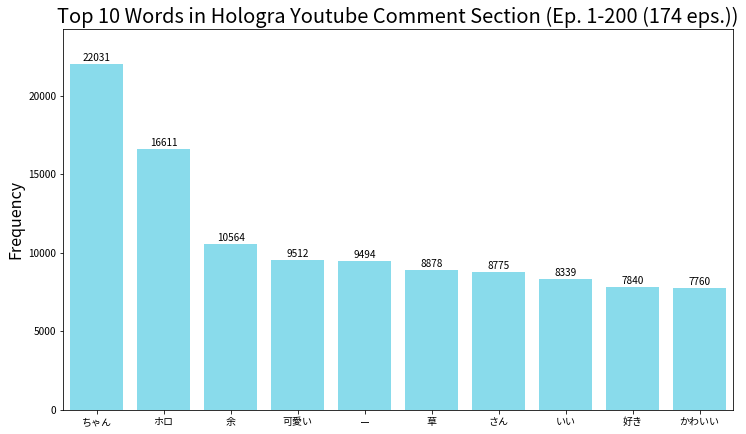

In [8]:
# top 10 words in word cloud
freq_10 = [int(i) for i in top_words_10[1]]
word_10 = top_words_10[0]

plt.figure(figsize=(12,7))
plt.margins(0.01, 0.1)
plt.bar(word_10, freq_10, color='#89dbeb')
add_labels(word_10, freq_10, -200)
plt.ylabel('Frequency')
plt.title(f'Top 10 Words in Hologra Youtube Comment Section ({SUBTITLE})')
plt.savefig('visuals/hologra_top_10_words_jp.png', transparent=False)
plt.show()